<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/Bagging_%26_Boosting_practice_on_Loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.2.2

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.6.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
loan_data = pd.read_csv("loan_data.csv")
loan_data = pd.get_dummies(loan_data, drop_first=True)
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


                       Feature  Importance
6            days.with.cr.line    0.113541
7                    revol.bal    0.113148
2                  installment    0.113030
4                          dti    0.112646
3               log.annual.inc    0.111310
8                   revol.util    0.109881
1                     int.rate    0.104759
5                         fico    0.078838
9               inq.last.6mths    0.053102
0                credit.policy    0.015796
13  purpose_debt_consolidation    0.014221
10                 delinq.2yrs    0.013764
11                     pub.rec    0.009625
17      purpose_small_business    0.008933
12         purpose_credit_card    0.008314
15    purpose_home_improvement    0.007691
14         purpose_educational    0.007038
16      purpose_major_purchase    0.004362


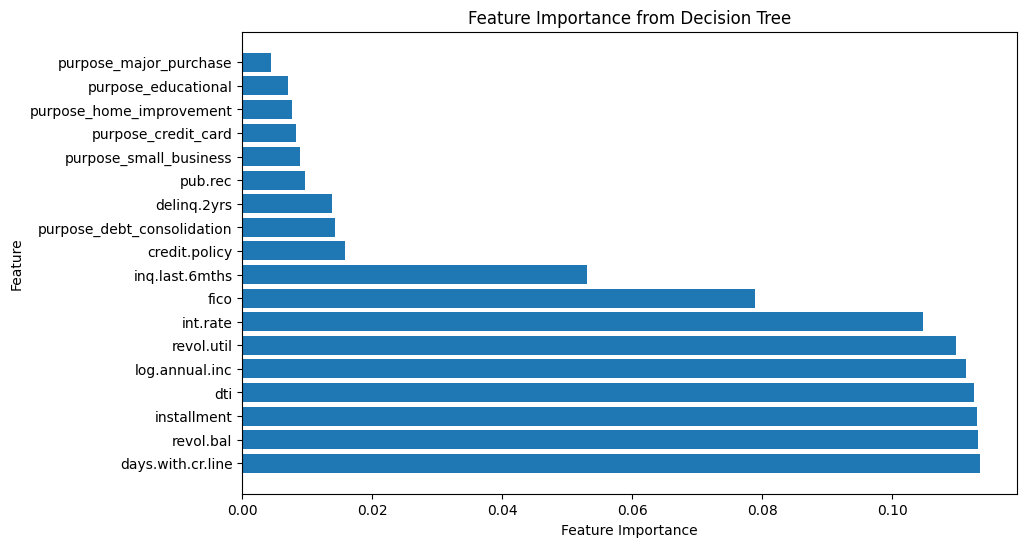

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

X=loan_data.drop('not.fully.paid',axis=1)
y=loan_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = RandomForestClassifier(random_state=1)
tree_model.fit(X_train, y_train)

feature_importances = tree_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree")
plt.show()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


<Axes: ylabel='not.fully.paid'>

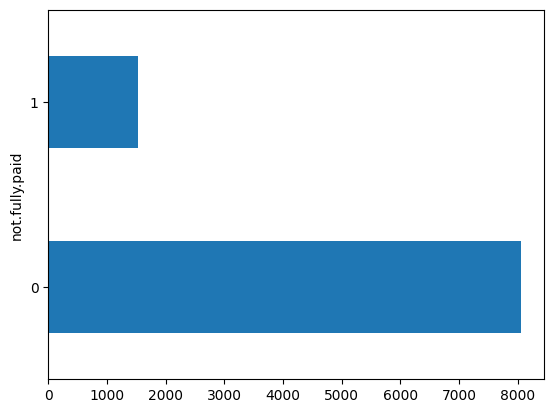

In [ ]:
print(loan_data['not.fully.paid'].value_counts())
loan_data['not.fully.paid'].value_counts().plot(kind='barh')

In [ ]:
X=loan_data[['revol.bal', 'int.rate', 'log.annual.inc', 'dti', 'days.with.cr.line', 'revol.util', 'installment']]
StandardScaler().fit_transform(X)
y=loan_data['not.fully.paid']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

n_estimators_values = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
best_n_estimators = None
best_accuracy = 0

for n_estimators in n_estimators_values:
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, random_state=42)
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best n_estimators:", best_n_estimators)

final_gb_classifier = GradientBoostingClassifier(n_estimators=best_n_estimators, random_state=42)
final_gb_classifier.fit(X_train, y_train)

y_pred_test = final_gb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Best n_estimators: 200
Test Accuracy: 0.8418580375782881


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

n_estimators_values = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
best_n_estimators = None
best_accuracy = 0

for n_estimators in n_estimators_values:
    clf = XGBClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best n_estimators:", best_n_estimators)

finalclf = XGBClassifier(n_estimators=best_n_estimators, random_state=42)
finalclf.fit(X_train, y_train)

y_pred_test = finalclf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Best n_estimators: 200
Test Accuracy: 0.8220250521920668


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

n_estimators_values = [200, 300, 400, 500, 600, 700, 800, 900, 1000]
best_n_estimators = None
best_accuracy = 0

for n_estimators in n_estimators_values:
    clf = LGBMClassifier(n_estimators=n_estimators, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print("Best n_estimators:", best_n_estimators)

finalclf2 = LGBMClassifier(n_estimators=best_n_estimators, random_state=42)
finalclf2.fit(X_train, y_train)

y_pred_test = finalclf2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

[LightGBM] [Info] Number of positive: 926, number of negative: 4820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 5746, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161156 -> initscore=-1.649655
[LightGBM] [Info] Start training from score -1.649655
[LightGBM] [Info] Number of positive: 926, number of negative: 4820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 5746, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161156 -> initscore=-1.649655
[LightGBM] [

In [ ]:
base_learners = [
    ('gb', final_gb_classifier),
    ('xgb', finalclf),
    ('lgb', finalclf2)
]

meta_learner = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5, n_jobs=1)
stacking_clf.fit(X_train, y_train)
stack_y_pred = stacking_clf.predict(X_test)
stack_accuracy = accuracy_score(y_test, stack_y_pred)
print("Stacking Classifier Accuracy:", stack_accuracy)

[LightGBM] [Info] Number of positive: 926, number of negative: 4820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1747
[LightGBM] [Info] Number of data points in the train set: 5746, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161156 -> initscore=-1.649655
[LightGBM] [Info] Start training from score -1.649655
[LightGBM] [Info] Number of positive: 740, number of negative: 3856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1741
[LightGBM] [Info] Number of data points in the train set: 4596, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161010 -> initscore=-1.650735
[LightGBM] [Info] Start training from score -1.650735
[LightGBM] [Info] Numb

In [ ]:
print(X)
print(y)

      revol.bal  int.rate  log.annual.inc    dti  days.with.cr.line  \
0         28854    0.1189       11.350407  19.48        5639.958333   
1         33623    0.1071       11.082143  14.29        2760.000000   
2          3511    0.1357       10.373491  11.63        4710.000000   
3         33667    0.1008       11.350407   8.10        2699.958333   
4          4740    0.1426       11.299732  14.97        4066.000000   
...         ...       ...             ...    ...                ...   
9573     215372    0.1461       12.180755  10.39       10474.000000   
9574        184    0.1253       11.141862   0.21        4380.000000   
9575      10036    0.1071       10.596635  13.09        3450.041667   
9576          0    0.1600       10.819778  19.18        1800.000000   
9577      37879    0.1392       11.264464  16.28        4740.000000   

      revol.util  installment  
0           52.1       829.10  
1           76.7       228.22  
2           25.6       366.86  
3           73.2   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

In [ ]:
LR = LogisticRegression(max_iter=100000)
LR.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [ ]:
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8399443284620738


In [ ]:
random_forest_model = LogisticRegression(max_iter=100000)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8399443284620738


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model_pred_test= dt_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_model_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.7345163535142658
